# Numpy Basics

Probably the biggest shift when getting started with data science is the syntax of numpy and pandas because it differs so much from other programming paradigms.  In this section we will walk through some numpy basics:

* why numpy?
* introduction to tensors
* numpy shapes
* numpy slicing
* numpy querying
* linear algebra in numpy

## Why Numpy?

Technically, anything you can do in numpy you can do in plain old python.  And arguably the syntax will be easier to understand, that is, unless you use numpy as it is intended.  Numpy _can_ be used for all the basic stuff that you'll find most of the examples for on the internet.  But it's really _intended_ to be used for a new paradigm of programming.  One that's caught on in the statistical and deep learning communities (which have at least some overlap).  

Numpy's api and computation is optimized for the manipulation of algebraic structures.  You can use it to do most of the computation that you can do with vanilla Python, or any other programming lanugage.  But you probably shouldn't.  We can think of the numpy api as sort of a directed language.  It's not quiet that, because numpy is mostly "about" syntax change.  You are thinking about the world from a difference lense.  But I digress.



* incredible speed - numpy is _much_ faster than vanilla python (it can even outperform Java sometimes)
* a beautiful and well organized api
* tons of utility functions
* amazing documentation
* it's completely free (whaaaaat)

To really understand numpy and the power it brings, we need to understand tensors.  Because without them, numpy honestly doesn't make much sense, at least at first.  And even once you start to get used to the syntax, without the mental model of a tensor, you'll completely miss the point of using it.

## Tensors

Tensors are some of the most powerful objects around.  In fact, this book is basically just a "how do I use tensors" most of the time.  The chapter on linear regression?  That's just about tensors.  The chapter on classification?  More applications of tensors.  Much of machine learning is built on tensors.  Specifically, on matrices.  Because I define the matrix in another chapter, I won't go into a ton of detail about what they are, or how to use them.

* scalars
* vectors
* matrices
* order-3 tensors and higher

A scalar is an order zero tensor - because it's just a single number, like say the number `5`.  A vector is a one dimensional collection of numbers representing data or an equation, like: 

$$ \begin{pmatrix}
1  \\
4  \\
7 
\end{pmatrix}
$$


A matrix is a two dimensional collect of numbers representing a system of equations, like:

$$
\begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{pmatrix}
$$


An order three tensor looks like a data cube.  There is no easy way to show such a cube in latex, so you'll have to imagine this to some extent:

$$ A_{1} = 
\begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{pmatrix}
$$

$$ A_{2} = 
\begin{pmatrix}
3 & 2 & 3 \\
7 & 6 & 6 \\
7 & 2 & 9
\end{pmatrix}
$$

$$ A_{3} = 
\begin{pmatrix}
1 & 2 & 3 \\
7 & 6 & 4 \\
6 & 2 & 19
\end{pmatrix}
$$


Now imagine $A_{1}, A_{2}, A_{3}$ as one object.  This is an order three tensor.  It has three axes - $(i,j,k)$ and you can specify elements across these three axes.  So $(0,0,0) = 1$, $(1,0,0) = 4$, and $(3,0,3) = 6$.  Here the i is the row index, j is the column index and k is the matrix index.  You can also do this for order 4 and up to n, where n is any finite natural number you like.  Why might you want to ever do this in practice?  It turns out there are actually a ton of good reasons.


Here are just two of them:

1. Let's say you want to model multivariate timeseries geospatial data.  This is naturally an order 4 tensor.  The first two dimensions will be each snapshot of multivariate data.  Your third dimension will be that snapshot overtime.  And your forth will be over time and different geographies.  Thinking about it this way is useful for capturing shared weights between time and geographies.  How you model your data matters.  And by ignoring the time or geospatial components of your data, you might lose some important information.

2. You can get a performance boost, statistically speaking.  As this paper shows: https://arxiv.org/pdf/1811.06569.pdf you can get a decent accuracy boost by treating your neural network as a higher order tensor.


## Numpy Shapes

Now that you know what a tensor is, the syntax of numpy will seem obvious and straight forward.  Let's start by showing how to represent each of the tensors we've discussed thus far:

In [1]:
# order 0 tensor
import numpy as np

scalar = np.array([1])
print(scalar)

[1]


You may think we've done nothing new here.  But actually we have!  For starters, numpy attaches types to anything passed into it.  And it does this _implicitly_.  You never have to name the types.  That by itself would be a feat of engineering prowess.  Let's see what I'm talking about:

In [3]:
scalar.dtype

dtype('int64')

The `dtype` property tells us what kind of data is in our tensor.  Since there are mathematical consequences to what's in our tensor, it's best to define one type per tensor.  Usually floats are the most flexible.  Of course, you can define a tensor with multiple types.  But for any serious mathematical computation, this is discouraged.  However, there are lots of programming instances when defining multiple types in a data structure is useful and important, which is why this paradigm is supported:

In [4]:
np.array(["hello", 1])

array(['hello', '1'], dtype='<U5')

Now that we have seen an order 0 tensor and an order 1 tensor, by accident, let's define another order 1 tensor, called a vector:

In [5]:
vector = np.array([1, 4, 7])
print(vector)

[1 4 7]


There are a few things to note here:

1. a vector is a collection of scalars.
2. a vector represents a mathematical object, not just an array.

Because this is a mathematical object, we can do things like this:

In [10]:
vector_one = np.array([1, 4, 7])
vector_two = np.array([2, 4, 6])

np.matmul(vector_one, vector_two.T)

60

If you've ever taken a linear algebra course the answer that's produced will seem surprising.  That's because technically numpy defaults to an array of scalars for a one dimensional array passed to the `np.array` method, rather than a vector.  The difference here is important.

Because algebraic objects are defined in part by the algebraic operators attached to them, this detail matters.  Specifically, here the "multiplication" attached to our vectors is the inner product in this case.  If we want the outer product, which is what most folks who have taken linear algebra would expect, then we need to tell numpy that we are working with tensors or order 1 aka vectors and not a collection of scalars.

We do that by using the `reshape` method a powerful tool that will allow us to represent tensors of any order we like.  But first let's start with the basics of turning a collection of scalars into an order 1 tensor, aka a vector:

In [17]:
vector_one = np.array([1, 4, 7])
vector_two = np.array([2, 4, 6])

vector_one = vector_one.reshape(3, 1)
vector_two = vector_two.reshape(1, 3)
print("vector one:")
print(vector_one)
print("vector two:", vector_two)
print("result:")
np.matmul(vector_one, vector_two)

vector one:
[[1]
 [4]
 [7]]
vector two: [[2 4 6]]
result:


array([[ 2,  4,  6],
       [ 8, 16, 24],
       [14, 28, 42]])

By reshaping our vectors to the appropriate shapes, we were able to produce a matrix!  This is a general fact of linear algebra - you can get a matrix by applying a matrix multiplication (`matmul`), also known as the outer product, to two vectors.  This "trick" of taking two lower dimensional tensors to create a higher order one will actually work for _any_ tensor we like.  If we want to recover an order 3 tensor we simply need to multiply a matrix by a vector.  That's because the order is additive, by tensor product!  Let's see an example:

In [55]:
a = np.array([[ 5, 1 ,3], 
              [ 1, 1 ,1], 
              [ 1, 2 ,1]])
b = np.array([1, 2, 3])
print(np.tensordot(a, b, axes=0))

[[[ 5 10 15]
  [ 1  2  3]
  [ 3  6  9]]

 [[ 1  2  3]
  [ 1  2  3]
  [ 1  2  3]]

 [[ 1  2  3]
  [ 2  4  6]
  [ 1  2  3]]]


Here `a` is a matrix, `b` is a tensor.  And by taking the tensor product of the two of them, we recover an order 3 tensor!  Notice we have to provide an axes or the `tensorproduct` method.  This is because a tensor product can be defined on any order.  We've already seen an order 1 tensor product, the inner product.  And we've seen an order 2 tensor product, the outer product.  In higher spaces, we generally refer to the product as simply the tensor product where the order comes from context.  However, please take care to be clear about the shapes of your tensors, otherwise you'll end up doing the _wrong multiplication_.  

I'll leave as an exercise creating tensors of order 4, 5, and 6.  Happy multiplying!

## Numpy Slicing

Now that we've seen how to create our tensors the next step is to be able to index into them.  The number of axes that you specify will determine how deep a slice you get back.  For instance, if you are working with an order 3 tensor and you specify one axes, you'll get back a matrix.  If you specify two, you'll get back a vector.  And if you specify all three you'll get back a scalar.  Let's see some examples:

In [57]:
# Getting back a matrix
a = np.array([[ 5, 1 ,3], 
              [ 1, 1 ,1], 
              [ 1, 2 ,1]])
b = np.array([1, 2, 3])
order_3_tensor = np.tensordot(a, b, axes=0)

order_3_tensor[:, :, 0]

array([[5, 1, 3],
       [1, 1, 1],
       [1, 2, 1]])

The numpy syntax for slicing may seem somewhat familar, but maybe not.  In vanilla Python you can choose a number of elements by slicing:

In [ ]:
listing = list(range(20))

print(listing[:])

The `[:]` just gives back a "slice" that's equal to the whole array, because we didn't specify any start an end.  But if say we just wanted the last 3 elements we can do this:

In [59]:
listing = list(range(20))

print(listing[-3:])

[17, 18, 19]


Of course, we can fully specify the start and end as well:

In [60]:
listing = list(range(20))

print(listing[5:9])

[5, 6, 7, 8]


Of course, that's only for a one dimensional array.  In numpy, we are dealing with _many_ dimensions, which is why the syntax looks different.  In the example above we had:

`order_3_tensor[:, :, 0]`

The first axis is selected completely so like with vanilla Python lists, we simply do `[:` for the whole thing.  Next we get the entire second axis so we have: `[:, :`.  And finally, we just want the first "element" along the third axis: `[:, :, 0]`.  At first, this syntax seems confusing to everyone.  But once it clicks, by understanding numpy arrays as tensors, then everything in the syntax becomes _obvious_.

Let's move onto our second example.  This time we'll get back just a vector:

In [61]:
# Getting back a vector
a = np.array([[ 5, 1 ,3], 
              [ 1, 1 ,1], 
              [ 1, 2 ,1]])
b = np.array([1, 2, 3])
order_3_tensor = np.tensordot(a, b, axes=0)

order_3_tensor[:, 0, 0]

array([5, 1, 1])

As you can see, we've specified _two_ axes and therefore, we get back an order 1 tensor.  Now, let's move onto the final example and get back just a scalar:

In [62]:
# Getting back a scalar
a = np.array([[ 5, 1 ,3], 
              [ 1, 1 ,1], 
              [ 1, 2 ,1]])
b = np.array([1, 2, 3])
order_3_tensor = np.tensordot(a, b, axes=0)

order_3_tensor[0, 0, 0]

5

Something to notice, the first order 2 slice of our order 3 tensor is just the matrix `a`.  This is because the first element in our vector `b` is a 1.  I'll leave as an exercise, to see if you can write a slice that recovers the first row of matrix a.  Your answer should look like this:

`[5, 1, 3]`

Here is the starter code:

In [63]:
a = np.array([[ 5, 1 ,3], 
              [ 1, 1 ,1], 
              [ 1, 2 ,1]])
b = np.array([1, 2, 3])
order_3_tensor = np.tensordot(a, b, axes=0)

# put in your slices here
#order_3_tensor[, , ]

Note: there is more than one way to recover the row in question.

## Numpy Querying

So far we've looked at the mathematical advantages of numpy.  There was another claim I made, that numpy is blazing fast.  And I wasn't kidding.  Compare numpy with vanilla python on _many_ operations and you'll see it's power.  That's because numpy is written in C with it's api specified in Python.  This means it can take advantage of the high level-ness of Python, while keeping the performance of C.  Truly, numpy is a modern marvel.

Let's see some examples of numpy's performance in action:

In [64]:
%timeit array = np.random.normal(0, 1, size=10000)

364 µs ± 20.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [68]:
import random
def generate_array():
    return [random.gauss(0, 1) for _ in range(10000)]

%timeit generate_array()

5.55 ms ± 256 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


As you can see, numpy is an _order_ of magnitude faster.  There are a lot of examples similar to this.  We'll look at just a few more:

In [69]:
array_one = np.random.normal(0, 1, size=10000)
array_two = np.random.normal(0, 1, size=10000)

In [70]:
%timeit array_one + array_two

5.15 µs ± 16.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [73]:
def add_array_elements(array_one, array_two):
    return [array_one[index] + array_two[index]
            for index in range(len(array_one))]

array_one = generate_array()
array_two = generate_array()

In [74]:
%timeit add_array_elements(array_one, array_two)

715 µs ± 1.35 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


This time numpy is _2 orders_ of magnitude faster.  And the syntax was _much_ clearer.  Granted, it is less clear what we are doing, unless you know the numpy api.  Whenever you add two vectors in numpy, this adds each element together.  So beware!  You can also do multiplication just as easily:

In [75]:
array_one = np.random.normal(0, 1, size=10000)
array_two = np.random.normal(0, 1, size=10000)

In [76]:
%timeit array_one * array_two

4.57 µs ± 82.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [78]:
def multiply_array_elements(array_one, array_two):
    return [array_one[index] * array_two[index]
            for index in range(len(array_one))]

array_one = generate_array()
array_two = generate_array()

In [79]:
%timeit multiply_array_elements(array_one, array_two)

727 µs ± 6.71 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


As you can see the orders of magnitude are similar for multiplication as they were for addition.  This is actually a _much_ bigger deal than may be obvious from these two examples.  All of linear algebra relies on these two operations.  That means linear regression, logistic regression, neural networks are all around 100 times faster implemented with numpy as compared to vanilla Python.  Of course, that is a blanket statement.  There are things you can do to make vanilla Python move faster.  And you can implement numpy poorly.  So this is a statement that needs to be taken with a grain of salt.  But still, numpy is faster for the things that matter to folks working in statistics and machine learning.  And that's just a fact.

Since numpy is _so fast_.  It can actually be used as a minimal in memory database.  Here we'll go over some of the basics for querying data in numpy.  Some of the syntax here will be confusing at first, but with time and practice it will become clear.

Let's look at a simple example of selecting a specific section of elements:

In [81]:
array = np.random.normal(0, 1, size=10000)

len(array[array > 0.5])/len(array)

0.3142

I did a little stylizing here returning the percentage of the array over 0.5.  But basically this shows us the querying syntax.  This syntax is definitely _not_ obvious on first blush.  That said, once you get used to it, it's pretty powerful.  What's going on here is the following:

the inner bit of syntax: `array > 0.5` is a boolean statement.  That is, implicitly every element of the array is checked for the condition, element of array greater than 0.5.  If the element meets the condition `True` is returned, otherwise False is returned.  



Then a boolean array is passed to the array as a slice:

`array[boolean statement goes here]`.

Then indices where the index in question is `True` is returned.  Any indices that return `False` are ommited.  In this way, you can "semantically slice" your array.  To make this concrete, let's look at just the result of `array > 05`:

In [82]:
array > 0.5

array([False,  True, False, ..., False, False, False])

As you can see, this is just an array of boolean values.  And if we counted up the number of times that resultant array has the value `True` it would equal the size of the semantically sliced array: `array[array > 0.5]`:

In [83]:
print((array > 0.5).astype(int).sum())
print(len(array[array > 0.5]))

3142
3142


The way I counted the number of `True`'s may be confusing, so let's look at that: 

By casting the `True`'s and `False`'s as type `int` we turn the `True`'s into `1`'s and the `False`'s into `0`'s. 

We've show a simple example of how to query with numpy, but these examples can be as sophisticated as they are in any SQL dialect.  Next let's look at a complex querying statement - one with two statements:

Here we will select all the elements between 0.5 and 0.7 only

In [4]:
array = np.random.normal(0, 1, size=10000)

result = array[
    (array > 0.5) &
    (array < 0.7)
]
len(result)/len(array)

0.0666

Notice here the use of the `&` symbol.  This stands for 'and' when dealing with boolean statements.  Specifically those where both numbers are represented as binary.  Therefore we refer to `&` as `binary and`.  

The way this operator works is as follows:

1 `&` 1 = 1

1 `&` 0 = 0

0 `&` 1 = 0

If we have longer binary numbers, then we simply apply the `&` element wise across the "string" of binary numbers:

10 `&` 01 = 00

There are other "binary" operators:

* OR = `|`
* NOT = `~`

With these three operators we can create very sophisticated queries into our numpy arrays.  For instance, let's get all the numbers between 0.5 and 0.7 or the numbers less than 0.1:

In [5]:
result = array[
    ((array > 0.5) &
    (array < 0.7)) |
    (array < 0.1)
]
len(result)/len(array)

0.6026

Notice, if we want contiguous elements we should use an `&` statement.  If we want elements from different sections of the array, we should use an `|` statement.  Now let's say we wanted everything that's not amongst those elements:

In [6]:
result = array[
    ~(((array > 0.5) &
    (array < 0.7)) |
    (array < 0.1))
]
len(result)/len(array)

0.3974

Often times the `~` operator may seem unnecessary, but if you're querying from a variable it can make life very easy:

In [7]:
original_query = ((array > 0.5) & (array < 0.7)) | (array < 0.1)
result = array[~original_query]
len(result)/len(array)

0.3974

Now that we've seen how to query into our array's, it's time to move onto the real heart of numpy - it's use in writing programs dealing with linear algebra.

## Linear Algebra and Numpy

In this section we will cover theoretical and practical notions regarding linear algebra.

Matrix Basics:

* Row Reduced Echelon Form
* Linear Independence
* Invertability
* Dot Product
* Matrix as a function
* Determinants


## Row Reduction

Row reduction although of little practical importance is useful tool for understanding many concepts in linear algebra.  Through row reduction, linear transforms, invertability, bases, subspaces, and the importance of shape are revealed.  Additionally, there are many "practical" decompositions that are similar to row reduced echelon form but are harder to grasp mathematically.

The reason for the lack of practical importance of row reduction stems from the lack of precision of floating point numbers.  It is very, very hard to computer "zero".  Often it is the case that your computation will be off by a negliable amount, therefore the row reduction goes on forever.  Therefore, the row reduction algorithm we will implement will be incomplete in that we won't get an exact solution, but rather one that is "close enough".

We will accomplish this by rounding down, so that if a floating point number is ever less than 0.00001 it will be rounded down to zero.  This is a reasonable assumption for some systems, however is a completely unreasonable assumption for others.  Given our purpose we will allow this assumption to be made.  However, this code should not be used in real world situations, as it will possibly or even likely given incorrect results.

First lets look at an example of how we might do row reduction by hand.

In [91]:
import numpy as np

matrix = np.array([[1,2], [3,4]])
print("Start Matrix:")
print(matrix)
print()
matrix[1, :] = matrix[0,:]*3 - matrix[1, :] 
print("R2->R1*3-R2")
print(matrix)
print()
matrix[1, :] = matrix[1, :] * (0.5 * np.ones(2))
print("R2->R2*0.5")
print(matrix)
print()
matrix[0, :] = matrix[1, :]*2 - matrix[0, :]
print("R1->R1-R2*2")
print(matrix)
print()
matrix[0, :] = matrix[0, :] * (-1 * np.ones(2))
print("R1->R1*-1, end matrix")
print(matrix)


Start Matrix:
[[1 2]
 [3 4]]

R2->R1*3-R2
[[1 2]
 [0 2]]

R2->R2*0.5
[[1 2]
 [0 1]]

R1->R1-R2*2
[[-1  0]
 [ 0  1]]

R1->R1*-1, end matrix
[[1 0]
 [0 1]]


As you can see the goal is to go from any initial matrix to one in row reduced echelon form.  That is, from any matrix to the identity matrix.  In order to see the value of this technique, let's review one of the ways we can "view" a matrix - as a system of equations.  It is important to note, there are _many_ ways to think of matrices and this is but one.

If we are treating our matrix as a system of equations then we have the following equivalence:

$$
\begin{pmatrix}
1 & 2 \\
3 & 4 \\
\end{pmatrix}
$$

Is equivalent to:

$$ 1*x + 2*y $$ 

$$ 3*x + 4*y $$


Of course every equation ought to have an "equality", otherwise it's not really an equation.  To do this in matrix notation is straight forward, we just tack on a vector


$$ \left( 
\begin{array}{cc|c} 
1 & 2 & 5 \\ 
3 & 4 & 8 \end{array} 
\right) $$

Which is equivalent to:

$$ 1*x + 2*y = 5 $$ 

$$ 3*x + 4*y = 8 $$


Now that we have a right hand side, we can simply apply all the transformations to both the left hand side matrix and the right hand side vector, in effect solving the system of equations:

In [52]:
import numpy as np

matrix = np.array([[1,2], [3,4]])
vector = np.array([5, 8])
print("Start Matrix:")
print(matrix)
print()
print("Vector Start:")
print(vector)
print()
matrix[1, :] = matrix[0,:]*3 - matrix[1, :]
vector[1] = vector[0]*3 - vector[1]
print("R2->R1*3-R2")
print(matrix)
print()
print(vector)
print()
matrix[1, :] = matrix[1, :] * (0.5 * np.ones(2))
vector[1] *= 0.5
print("R2->R2*0.5")
print(matrix)
print()
print(vector)
print()
matrix[0, :] = matrix[1, :]*2 - matrix[0, :]
vector[0] = vector[1]*2 - vector[0]
print("R1->R1-R2*2")
print(matrix)
print()
print(vector)
print()
matrix[0, :] = matrix[0, :] * (-1 * np.ones(2))
vector[0] *= -1
print("R1->R1*-1, end matrix")
print(matrix)
print()
print(vector)

Start Matrix:
[[1 2]
 [3 4]]

Vector Start:
[5 8]

R2->R1*3-R2
[[1 2]
 [0 2]]

[5 7]

R2->R2*0.5
[[1 2]
 [0 1]]

[5 3]

[[1 0]
 [2 1]]
R1->R1-R2*2
[[-1  0]
 [ 0  1]]

[1 3]

R1->R1*-1, end matrix
[[1 0]
 [0 1]]

[-1  3]


Therefore we have the unique solution to the system of equations:

$$ x = -1, y = 3 $$

In case it wasn't clear, we apply transforms from the left hand side to the ride hand side as well, thus giving us a unique solution, assuming both equations hold true.

Now that we see how to do this by hand, let's pull out the component pieces and then write a general algorithm for doing row reduction:

1. check to see if a row is in the correct form.
2. find row pivot
3. subtract one row or a multiple of one row from another
4. multiply a row by a constant.
5. carry out the same steps on the accompanying vector


Now for our algorithm:

```
index_of_currect_incorrect_row = 0
while row not in correct form:
    if row pivot is not 1:
        multiply by inverse of row pivot
    do necessary subtractions so all non-pivot
    values are zero
    carry out all calculations on accompanying vector
    index_of_current_incorrect_row += 1
```

Notice that we used a term in our algorithm called the pivot.  This is a term for the element in a row that ought to be 1.  The column within the row that should be 1 is the same as the row number.  So the zeroth row should have a one in the zeroth column of the row.  The first row should have a 1 in the first column.  And so on and so forth.  In general, there ought to be 1s along the diagonal of the matrix (this is the element where the row index and column index are the same).

Now then, let's implement our algorithm!  Recall that we will be rounding to make sure this process doesn't go on forever!

In [87]:
import numpy as np

def subtract_rows(matrix, row_index, pivot_index):
    row_one = matrix[row_index, :]
    row_two = matrix[pivot_index, :]
    value = row_one[pivot_index]
    matrix[row_index, :] = row_one - value*row_two
    return matrix

def multiply_row(row, value):
    return (value) * np.ones(len(row))
    
def invert_pivot(matrix, pivot_index):
    row = matrix[pivot_index, :]
    value = row[pivot_index]
    matrix[pivot_index, :] = row * multiply_row(row, 1/value)
    return matrix
    
def get_identity(matrix):
    return np.identity(matrix.shape[1])

def is_pivot_one(matrix, pivot_index):
    return matrix[pivot_index, row_index] == 1

def invert_vector_pivot(matrix, vector, pivot_index):
    value = matrix[pivot_index, pivot_index]
    vector[pivot_index] = vector[pivot_index]*1/value
    return vector 

def subtract_vector_elems(matrix, vector, row_index, pivot_index):
    value = matrix[row_index, pivot_index]
    vector[row_index] = vector[row_index] - value*vector[pivot_index]
    return vector

def row_reduce(matrix, vector):
    cur_index = 0
    while (matrix != get_identity(matrix)).any():
        if not is_pivot_one(matrix, cur_index):
            vector = invert_vector_pivot(matrix, vector, cur_index)
            matrix = invert_pivot(matrix, cur_index)
            matrix = matrix.round(5)
            vector = vector.round(5)
        rows = list(range(matrix.shape[1]))
        rows.remove(cur_index)
        for row_index in rows:
            vector = subtract_vector_elems(
                matrix, vector, row_index, cur_index
            )
            matrix = subtract_rows(matrix, row_index, cur_index)
            matrix = matrix.round(5)
            vector.round(5)
        cur_index += 1
    return matrix, vector

matrix = np.array([[1,2], [3,4]])
vector = np.array([5, 8])
row_reduce(matrix, vector)

(array([[1, 0],
        [0, 1]]),
 array([-1,  3]))

Notice, we get the same result as before.  This is because we've been working with integers.  Things get very dicey as our numbers get smaller than one or greater than one.  However, that's why we round our matrix and vector so that they are _always_ within five significant digits after the decimal point.  Anything smaller than that is just rounded down to zero.  This means we can be "precise enough" for toy applications.  However in the real world, this assumption will lead us to incorrect results, which is why most scientific packages do not implement a row reduction scheme.  

In any event, the power of row reduction should be obvious at this point:

Assuming a solution exists, we can solve any system of equations, of attribitrary size and do so with great ease.  Let's consider this 100 x 100 system of equations:

In [89]:
import time
matrix = np.random.rand(100,100) * 100
vector = np.random.rand(100) * 100

start = time.time()
row_reduce(matrix, vector)
print(time.time() - start)

0.4182713031768799


Our little "toy" solver finds a unique solution in a little over four tenths of a second!!!  If you tried to do this by hand, I guarantee you, it would take _much_ longer.  And the chance of being error free rapidly approaches zero.  Just for fun, let's see how long it takes to do 1000 x 1000:

In [90]:
import time
matrix = np.random.rand(1000,1000) * 100
vector = np.random.rand(1000) * 100

start = time.time()
row_reduce(matrix, vector)
print(time.time() - start)

3740.573699235916


As said earlier, a lot of ideas flow from treating a matrix as a system of equations.  One notion already hinted at is that of "solutions" to the system.  Depending on the "shape" of the system, i.e. the number of rows and columns of the matrix, we know how many solutions are possible, apriori, or in other words, without actually solving the system!

If the number of rows and columns are equal and the number of columns is linearly independent, then there is one and only one solution to the system.  In other words, you can be sure that one value for each of the parameters, uniquely "solves" the system.  Why might we care about this?

Well as your number of equations grow, it becomes increasingly hard to know if a solution exists for your system.  Let us consider a real world example for clarity.  For this we will look at the Leontief Input-Output model.

In this model of the economy there are several sectors, each sector produces some outputs, but also requires some inputs.  In the simplest possible economy each industry at least partially depends on every other sector.

For our example we will consider the following example:

In [103]:
import pandas as pd

supply_matrix = np.random.rand(3,3) * 100
demand_vector = np.random.rand(3) * 100

df = pd.DataFrame(supply_matrix)
df.columns = ["Manufacturing", "Technology", "Real Estate"]
df.index = ["Manufacturing", "Technology", "Real Estate"]
df

,Manufacturing,Technology,Real Estate
Manufacturing,84.858511,13.412168,40.370916
Technology,28.237123,12.023302,88.507121
Real Estate,38.635010,60.052319,12.739408


We are making use of a dataframe in this example, only to make the matrix as clear as possible, but we can simply see this as an "annotated" matrix for now.  The product of each industry is defined on the diagonal of the matrix, so the (Manufacturing, Manufacturing) element is the output for Manufacturing, the industry.  Everything else in the Manufacturing row are inputs to the Manufacturing industry.  In general we can think of this matrix as our "Supply" of goods into the economy.

As for the vector that we've defined, this is our "Demand" for goods in the economy.  The reason for the equality is because the market "clears" and is therefore in equilibrium when Supply equals Demand.  So if we wish to find this equilibrium point, i.e. when utility is maximized, we need only solve this system of equations.

So we simply do:

In [104]:
row_reduce(supply_matrix, demand_vector)

(array([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [-0., -0.,  1.]]),
 array([0.7443059 , 0.35999748, 0.37158   ]))

As you can see, we were able to find a unique "solution", that is a unique value for the proportions that Manufacturing, Technology, and Real Estate out to produce in order to maximize utility!  Note, there is no special significance to the values of these values.  They are all less than one, merely by coincidence.  

## Linear Independence

I've already used this term, early in the text, but I failed to define it.  We will fix that here by giving a definition and providing some evidence of it's use.

Linear independence is best seen through the second view or a matrix which we will discuss, the geometrix view.  Below is an example of a matrix as a 2-D representation of vectors:

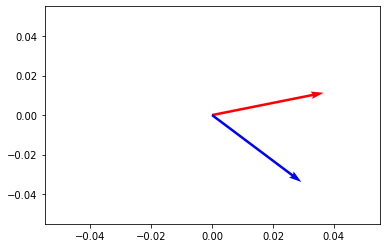

In [124]:
import numpy as np
import matplotlib.pyplot as plt

vector_one = np.array([5, 1])
vector_two = np.array([4, -3])
V = np.array([vector_one, vector_two])

plt.quiver([0, 0], [0, 0], V[:,0], V[:,1], color=['r','b'], scale=15)
plt.show()

Two vectors are considered linearly dependent if:

1. You can multiply by a constant to go from one vector to another.  This is called a dilation.

Let's look at a picture:

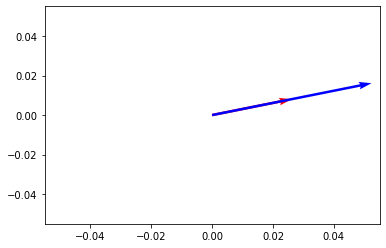

In [125]:
import numpy as np
import matplotlib.pyplot as plt

vector_one = np.array([5, 1])
vector_two = vector_one * 2
V = np.array([vector_one, vector_two])

plt.quiver([0, 0], [0, 0], V[:,0], V[:,1], color=['r','b'], scale=21)
plt.show()

As you can see the two vectors "rest" on top of one another.  In other words, one vector completely captures the other vector.

A set of vectors are considered linearly dependent as well if:

2. You can add or subtract any two of them together times a scalar to produce another vector in the set.

Let's look at another example:

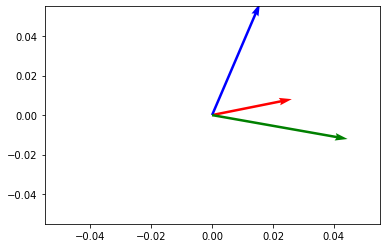

In [129]:
import numpy as np
import matplotlib.pyplot as plt

vector_one = np.array([5, 1])
vector_two = np.array([3, 7])
vector_three = vector_one*2 - vector_two*0.5
V = np.array([vector_one, vector_two, vector_three])

plt.quiver([0, 0, 0], [0, 0, 0], V[:,0], V[:,1], color=['r','b', 'g'], scale=21)
plt.show()

Here our green vector is a "linear combination" of our first two vectors, so by definition, the set of all three vectors is linearly dependent.  This all may seem arbitrary to this point, put let's see what happens if our system of equations is not linearly independent and we try to solve it:

In [143]:
import pandas as pd

vector_one = np.random.rand(3) * 100
vector_two = np.random.rand(3) * 100
vector_three = vector_one.copy()
matrix = np.array([vector_one, vector_two, vector_three]).T
matrix_two = np.random.rand(3, 3) * 100
vector = np.random.rand(3) * 100

print(matrix.shape == matrix_two.shape)
print(row_reduce(matrix_two, vector))
type(matrix), type(matrix_two)
print(row_reduce(matrix, vector))

True
(array([[ 1.,  0.,  0.],
       [-0.,  1.,  0.],
       [ 0.,  0.,  1.]]), array([0.42516846, 0.40225278, 1.22888   ]))


/home/eric/.local/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in double_scalars
/home/eric/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()
/home/eric/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()
/home/eric/.local/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in double_scalars


IndexError: index 3 is out of bounds for axis 0 with size 3

We get an error when we try to do the row reduction!  This is because we fail to row reduce our matrix.  Let's verify this by looking at another example:

In [150]:
import numpy as np

vector_one = np.array([1, 2, 3])
vector_two = np.array([3, 4, 5])
vector_three = 3 * vector_one + 2 * vector_two
matrix = np.array([vector_one, vector_two, vector_three])
vector = np.array([5, 8, 9])
print("Start Matrix:")
print(matrix)
print()
print("Vector Start:")
print(vector)
print()
matrix[1, :] = matrix[0,:]*3 - matrix[1, :]
vector[1] = vector[0]*3 - vector[1]
print("R2->R1*3-R2")
print(matrix)
print()
print(vector)
print()
matrix[2, :] = matrix[0,:]*9 - matrix[2, :]
vector[2] = vector[0]*9 - vector[2]
print("R2->R1*9-R2")
print(matrix)
print()
print(vector)
print()
matrix[1, :] = matrix[1, :] * (0.5 * np.ones(3))
vector[1] *= 0.5
print("R2->R2*0.5")
print(matrix)
print()
print(vector)
print()
matrix[2, :] = matrix[1,:]*4 - matrix[2, :]
vector[2] = vector[1]*4 - vector[2]
print("R2->R1*9-R2")
print(matrix)
print()
print(vector)
print()

matrix[0, :] = matrix[1, :]*2 - matrix[0, :]
vector[0] = vector[1]*2 - vector[0]
print("R1->R1-R2*2")
print(matrix)
print()
print(vector)
print()
matrix[0, :] = matrix[0, :] * (-1 * np.ones(3))
vector[0] *= -1
print("R1->R1*-1, end matrix")
print(matrix)
print()
print(vector)

Start Matrix:
[[ 1  2  3]
 [ 3  4  5]
 [ 9 14 19]]

Vector Start:
[5 8 9]

R2->R1*3-R2
[[ 1  2  3]
 [ 0  2  4]
 [ 9 14 19]]

[5 7 9]

R2->R1*9-R2
[[1 2 3]
 [0 2 4]
 [0 4 8]]

[ 5  7 36]

R2->R2*0.5
[[1 2 3]
 [0 1 2]
 [0 4 8]]

[ 5  3 36]

R2->R1*9-R2
[[1 2 3]
 [0 1 2]
 [0 0 0]]

[  5   3 -24]

R1->R1-R2*2
[[-1  0  1]
 [ 0  1  2]
 [ 0  0  0]]

[  1   3 -24]

R1->R1*-1, end matrix
[[ 1  0 -1]
 [ 0  1  2]
 [ 0  0  0]]

[ -1   3 -24]


As you can see, this is the farest we can take this.  We can't row reduce the matrix any further because we've elminated the pivot the final row.  This is because vector three is a linear combination of vector one and vector two.  Therefore the columns aren't linearly independent.  

What we've seen so far generalizes to _any_ system of equations.  Additionally, any system of equations such that the number of rows and number of columns are unequal will not be row reducible, unless there are "extra" rows or columns that are linear combinations of a set of a "square" subset which are linearly independent.


To make this concrete consider this linear independent matrix:

$$
\begin{pmatrix}
1 & 2 \\
3 & 4 \\
\end{pmatrix}
$$

Now if we add the following vector:

$$
\begin{pmatrix}
 4 \\
 6 \\
\end{pmatrix}
$$

We get:

$$
\begin{pmatrix}
1 & 2 & 4\\
3 & 4 & 6\\
\end{pmatrix}
$$


Let's see what happens if we try to row reduce this matrix:

In [161]:
a = np.array([1, 2, 4])
b = np.array([3, 4, 6])

matrix = np.array([a, b])

print("Start Matrix:")
print(matrix)
print()
matrix[1, :] = matrix[0,:]*3 - matrix[1, :]
vector[1] = vector[0]*3 - vector[1]
print("R2->R1*3-R2")
print(matrix)
print()
matrix[1, :] = matrix[1, :] * (0.5 * np.ones(3))
vector[1] *= 0.5
print("R2->R2*0.5")
print(matrix)
print()
matrix[0, :] = matrix[1, :]*2 - matrix[0, :]
vector[0] = vector[1]*2 - vector[0]
print("R1->R1-R2*2")
print(matrix)
print()
matrix[0, :] = matrix[0, :] * (-1 * np.ones(3))
vector[0] *= -1
print("R1->R1*-1, end matrix")
print(matrix)
print()

Start Matrix:
[[1 2 4]
 [3 4 6]]

R2->R1*3-R2
[[1 2 4]
 [0 2 6]]

R2->R2*0.5
[[1 2 4]
 [0 1 3]]

R1->R1-R2*2
[[-1  0  2]
 [ 0  1  3]]

R1->R1*-1, end matrix
[[ 1  0 -2]
 [ 0  1  3]]



As you can see there is a 2 x 2 identity matrix embedded in this 2 x 3 matrix.  We can't row reduce any further than this, but clearly the third vector is surpurflous and doesn't contribute to us finding a unique solution.  In other words, any system of equations like this will have _infinitely_ many equations.  A unique solution for x and y.  But an infinite number of solutions for the z variable. 

## Invertability

It turns out that the uniqueness of solutions of systems of equations has a consequence, specifically that if a matrix has a unique solution and it's individual component vectors are linearly independent, then the matrix is invertable.  Consequentially, invertability is not a quality for all matrices and therefore you cannot always take an inverse.  

In order to find the inverse of the matrix we simply apply all the same steps to an identity matrix that we apply to the original matrix as we row reduce it.

In [184]:
def inverse_subtract_rows(matrix, inverse, row_index, pivot_index):
    row_one = matrix[row_index, :]
    row_two = matrix[pivot_index, :]
    inverse_row_one = inverse[row_index, :]
    inverse_row_two = inverse[pivot_index, :]
    value = row_one[pivot_index]
    matrix[row_index, :] = row_one - value*row_two
    inverse[row_index, :] = inverse_row_one - value*inverse_row_two
    return matrix, inverse
    
def inverse_invert_pivot(matrix, inverse, pivot_index):
    row = matrix[pivot_index, :]
    inverse_row = inverse[pivot_index, :]
    value = row[pivot_index]
    matrix[pivot_index, :] = row * multiply_row(row, 1/value)
    inverse[pivot_index, :] = inverse_row * multiply_row(inverse_row, 1/value)
    return matrix, inverse
    
def find_inverse(matrix):
    cur_index = 0
    inverse = np.identity(matrix.shape[1])
    while (matrix != get_identity(matrix)).any():
        if not is_pivot_one(matrix, cur_index):
            matrix, inverse = inverse_invert_pivot(matrix, inverse, cur_index)
            matrix = matrix.round(5)
        rows = list(range(matrix.shape[1]))
        rows.remove(cur_index)
        for row_index in rows:
            matrix, inverse = inverse_subtract_rows(
                matrix, inverse, row_index, cur_index
            )
            matrix = matrix.round(5)
        cur_index += 1
    return inverse

matrix = np.array([[1, 2], [3, 4]])
inverse = find_inverse(matrix)

matrix = np.array([[1, 2], [3, 4]])
matrix @ inverse

array([[1., 0.],
       [0., 1.]])

As you can see we were able to find the inverse by modifying the the row reduction code.  When you do a matrix mulitplication of the original matrix and it's inverse you get back the identity matrix, because this is the matrix equivalent of a "1".

Being able to invert a matrix is incredibly useful as we'll come to see for linear regression and other modeling techniques.



## Matrix Multiplication

Here we'll take a deeper look at matrix multiplication, specificially we'll consider the dot product.  The matrix multiplication we just did:

`matrix @ inverse` 


For each row in the left hand side matrix, carry out the dot product with the column on the right hand side.  Therefore this will only work if the number of columns on the left hand side equals the number of rows on the right hand side.  

Let's look at a quick example with two matrices:


$$
\
\begin{pmatrix}
1 & 2 \\
3 & 4 \\
\end{pmatrix}
%
\begin{pmatrix}
1 & 2 \\
3 & 4 \\
\end{pmatrix}
=
\begin{pmatrix}
7 & 10 \\
15 & 22 \\
\end{pmatrix}
\
$$

to get the top left cell of the resulting matrix, we do:

1(1) + 2(3) = 7

to get the top right cell of the resulting matrix, we do:

1(2) + 2(4) = 10

to get the bottom left cell of the resulting matrix, we do:

3(1) + 4(3) = 15

to get the bottom right cell of the resulting matrix, we do:

3(2) + 4(4) = 22

In general the algorithm for the ith row and jth column is:

$$ \sum_{k=1}^{n}a_{ik}b_{kj} $$

Note, we can also define the dot product for now vectors, simply by taking the transpose of the right hand side vector:


$$
\
\begin{pmatrix}
1 \\
3 \\
\end{pmatrix}
%
\begin{pmatrix}
1 & 2 \\
\end{pmatrix}
=
\begin{pmatrix}
7
\end{pmatrix}
\
$$


Notice, in this case the length of the two vectors must be equal, otherwise the dot product is not defined.

Because everything in linear algebra has both a geometric and algebriac interpretation we'll consider both of these when interpretting this new operator.


Let us consider the geometrix interpretation first:

$$ X \cdot Y = |X||Y|\cos\theta $$

Here $\theta$ is the angle between the two vectors.  

This formulation allows us to make the following statement:

If: 

$$ X \cdot Y = 0 $$

Then

$X$ is perpendicular to $Y$!


As for the algebriac interpretation:

In general, the dot product can be defined as the length of the projection of $X$ onto the unit vector in the direction of $Y$.  So we get a sense of the "magnitude" of X and Y by taking their dot product.


## Matrix as a Function

There won't be any real new concepts in this section, but we are going take a moment to notice some facts about matrices which will be valuable for how we think about them.  We treat a matrix in one of two ways:

1. As holding data
2. As "storing" transformations


The first representation of a matrix will probably be more familiar to most of you, if you've ever worked with excel, csvs or a database.  All of that data is stored as matrices.  

We've sort of been seeing this second representation throughout our discussion of linear algebra thus far.  Matrix multiplication is the major vehicle for applying our matrix.  If we consider the following example:


$$
\
\begin{pmatrix}
1 & 2 \\
3 & 4 \\
\end{pmatrix}
%
\begin{pmatrix}
1 & 0 \\
1 & 1 \\
\end{pmatrix}
=
\begin{pmatrix}
3 & 3 \\
7 & 4 \\
\end{pmatrix}
\
$$

We can treat our first matrix:

$$
\begin{pmatrix}
1 & 2 \\
3 & 4 \\
\end{pmatrix}
$$

As our data matrix.  And our second matrix:

$$
\begin{pmatrix}
1 & 0 \\
1 & 1 \\
\end{pmatrix}
$$

along with matrix multiplication as our function.  It transforms our input data and produces our resultant matrix:

$$
\begin{pmatrix}
3 & 3 \\
7 & 4 \\
\end{pmatrix}
$$


So we can sort of think of our second matrix as a function.  Where the matrix's values are the parameters to the function and the matrix plus the multiplication "is" the function.

A consequence of this way of thinking about matrices is that we can "combine" functions by applying matrix multiplication to individual matrices in order.


So for instance, say we had:

$$
\begin{pmatrix}
1 & 0 \\
0 & -1 \\
\end{pmatrix}
$$

and 

$$
\begin{pmatrix}
1 & 0 \\
1 & 1 \\
\end{pmatrix}
$$

If we do:

$$
\
\begin{pmatrix}
1 & 0 \\
0 & -1 \\
\end{pmatrix}
%
\begin{pmatrix}
1 & 0 \\
1 & 1 \\
\end{pmatrix}
=
\begin{pmatrix}
1 & 0 \\
-1 & -1 \\
\end{pmatrix}
\
$$

Then 

$$
\begin{pmatrix}
1 & 0 \\
-1 & -1 \\
\end{pmatrix}
$$


Is the same as first taking _any_ compatiable matrix and multiplying it first by:

$$
\begin{pmatrix}
1 & 0 \\
0 & -1 \\
\end{pmatrix}
$$

And then by

$$
\begin{pmatrix}
1 & 0 \\
1 & 1 \\
\end{pmatrix}
$$

Let's verify this:

In [17]:
import numpy as np

first_matrix = np.array([[1, 0], [0, -1]])
second_matrix = np.array([[1, 0], [1, 1]])
third_matrix =  second_matrix @ first_matrix 
random_matrix = matrix_two = np.random.rand(2, 2) * 100

first_intermediate_result = random_matrix @ second_matrix
second_intermediate_result = first_intermediate_result @ first_matrix 
(second_intermediate_result == random_matrix @ third_matrix).all()

True

Notice, the order in which the first and second matrix are combined matter!  So for instance, if we did this:

In [18]:
first_matrix = np.array([[1, 0], [0, -1]])
second_matrix = np.array([[1, 0], [1, 1]])
third_matrix =  first_matrix @ second_matrix 
random_matrix = matrix_two = np.random.rand(2, 2) * 100

first_intermediate_result = random_matrix @ second_matrix
second_intermediate_result = first_intermediate_result @ first_matrix 
(second_intermediate_result == random_matrix @ third_matrix).all()

False

All we did was switch the order of the matrix multiplication of the third_matrix.  This is because matrix multiplication is not commutative.  This means the order of the matrix multiplication will matter and in general, if we have two matrices, A and B then:

$$
AB \neq BA
$$

We've actually already used this fact.  The above was how we were able to arrive at the inverse of A given a row reduction scheme for A.  We applied each transform, storing the individual transforms in a matrix.  This necesary implies we can move in the other direction as well:

Going from one matrix to many "component" transformations.  The process of deducing these set of component transformations is called matrix decomposition.

## Determinants

The determinant of a matrix is a very helpful tool for understanding how a transformation matrix "acts" on a data matrix.

The determinant conveys two pieces of information:

1. the magnitude of the transform
2. whether the transform preserves or reverses orientation

This allows us to tell ahead of time how our matrix will transform other matrices and what we can expect as a result.  Computing determinants is easy with numpy, let's look at the detminerant of our "third_matrix" from the last example:

In [19]:
np.linalg.det(third_matrix)

-1.0

Now let's compare this with our other two matrices:

In [20]:
np.linalg.det(first_matrix), np.linalg.det(second_matrix)

(-1.0, 1.0)

As you can see, we get the magnitude from the first matrix and second matrix and we get the orientation change from the first matrix.  As should be clear, the determinant is a "lossy" measure, because we represent a matrix as a scalar.  However, there is still power in looking at representations like this.  We can assess the individual effects of component transformations.  And then see how their combined effects will augment and orient other matrices.